In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("diabetes.csv")
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


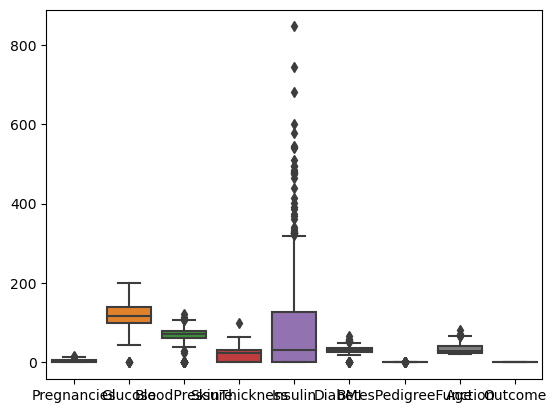

In [4]:
# Check for missing values
print(df.isnull().sum())

# Remove rows with missing values
df = df.dropna()

# Identify outliers using box plots
sns.boxplot(data=df)
plt.show()

# Remove outliers (optional)
df = df[(df['BMI'] < 60) & (df['BloodPressure'] < 110)]

# Transform categorical variables into dummy variables 
df = pd.get_dummies(df, columns=['Pregnancies'])


In [5]:
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target variable (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# Create a decision tree classifier
dt_classifier = DecisionTreeClassifier()

# Perform cross-validation to optimize hyperparameters
scores = cross_val_score(dt_classifier, X_train, y_train, cv=5)

# Print the average accuracy across all cross-validation folds
print("Average Accuracy:", scores.mean())


Average Accuracy: 0.6885245901639344


Accuracy: 0.6862745098039216
Precision: 0.5636363636363636
Recall: 0.5636363636363636
F1 Score: 0.5636363636363636
Confusion Matrix:
[[74 24]
 [24 31]]


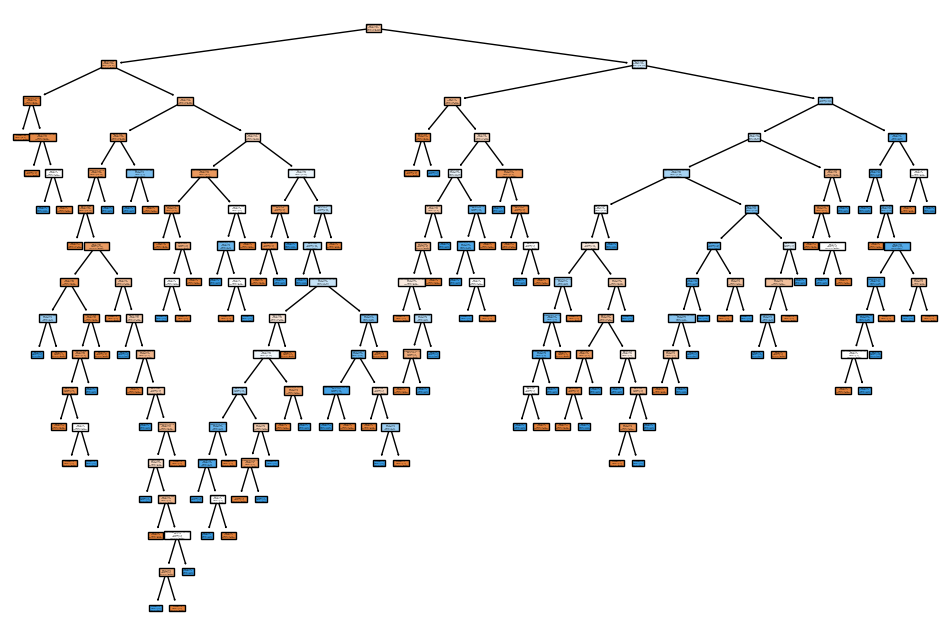

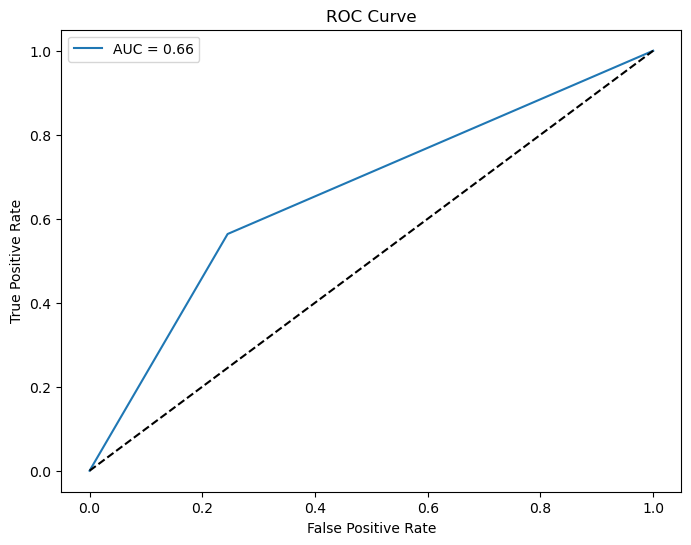

In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn import tree
import matplotlib.pyplot as plt

# Fit the decision tree classifier on the training data
dt_classifier.fit(X_train, y_train)

# Predict the test set labels
y_pred = dt_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Plot the decision tree
plt.figure(figsize=(12, 8))
tree.plot_tree(dt_classifier, feature_names=X.columns, class_names=['Non-diabetic', 'Diabetic'], filled=True)
plt.show()

# Calculate ROC curve and AUC
y_prob = dt_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
